<a href="https://colab.research.google.com/github/gaurav21s/deep-learning-basic/blob/main/ANN_regression%20and%20Functional%20API%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [209]:
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()

In [210]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [211]:
from sklearn.model_selection import train_test_split
X_train_full, X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=21)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)


In [212]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [213]:
np.random.seed(21)
tf.random.set_seed(21)

In [214]:
X_train.shape

(11610, 8)

In [215]:
model=keras.models.Sequential([
                               keras.layers.Dense(50,activation='relu',input_shape=X_train.shape[1:]),
                               keras.layers.Dense(25,activation='relu'),
                               keras.layers.Dense(1)
])

In [216]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                450       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 1,751
Trainable params: 1,751
Non-trainable params: 0
_________________________________________________________________


In [217]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adamax(learning_rate=0.01),
              metrics=['mae'])

In [218]:
mhistory=model.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6367 - mae: 0.5441 - val_loss: 0.3704 - val_mae: 0.4320
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4008 - mae: 0.4500 - val_loss: 0.3715 - val_mae: 0.4536
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3809 - mae: 0.4390 - val_loss: 0.3326 - val_mae: 0.4099
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3661 - mae: 0.4278 - val_loss: 0.3310 - val_mae: 0.4062
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3530 - mae: 0.4191 - val_loss: 0.3231 - val_mae: 0.3960
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3431 - mae: 0.4102 - val_loss: 0.3201 - val_mae: 0.3821
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3333 - mae: 0.4058 - val_loss: 0.3019 - val_mae: 0.3847
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [219]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2732 - mae: 0.3526


In [220]:
#mhistory.history

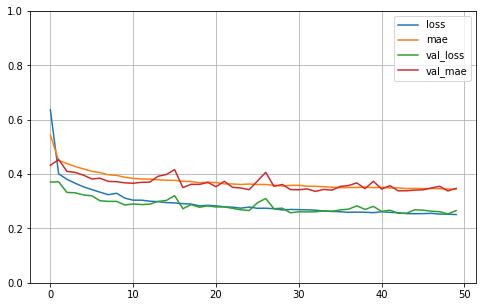

In [221]:
pd.DataFrame(mhistory.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

In [222]:
X_new=X_test[5:10]

In [223]:
ypred=model.predict(X_new)

In [224]:
print(ypred)
print(y_test[5:10])

[[2.558901 ]
 [1.9113387]
 [2.5134947]
 [5.0857844]
 [5.079102 ]]
[2.594   2.875   2.113   5.00001 5.00001]


In [225]:
model.save("Ann_regression.h5")

#Functional API

In [226]:
del model

In [227]:
keras.backend.clear_session()

In [228]:
input_=keras.layers.Input(shape=X_train.shape[1:])
hid1=keras.layers.Dense(50,activation='relu')(input_)
hid2=keras.layers.Dense(50,activation='relu')(hid1)
concat=keras.layers.concatenate([input_,hid2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_],outputs=[output])


In [229]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 50)           450         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 50)           2550        dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 58)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [230]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['mae'])

In [ ]:
mhistory=model.fit(X_train,y_train,epochs=48,validation_data=(X_valid,y_valid))

Epoch 1/48
363/363 [==============================] - 1s 2ms/step - loss: 1.1004 - mae: 0.6823 - val_loss: 0.4257 - val_mae: 0.4671
Epoch 2/48
363/363 [==============================] - 1s 2ms/step - loss: 0.4327 - mae: 0.4655 - val_loss: 0.3863 - val_mae: 0.4553
Epoch 3/48
363/363 [==============================] - 1s 2ms/step - loss: 0.3975 - mae: 0.4483 - val_loss: 0.3531 - val_mae: 0.4234
Epoch 4/48
363/363 [==============================] - 1s 2ms/step - loss: 0.3807 - mae: 0.4397 - val_loss: 0.3521 - val_mae: 0.4215
Epoch 5/48
363/363 [==============================] - 1s 2ms/step - loss: 0.3712 - mae: 0.4309 - val_loss: 0.3408 - val_mae: 0.4137
Epoch 6/48
363/363 [==============================] - 1s 2ms/step - loss: 0.3591 - mae: 0.4249 - val_loss: 0.3292 - val_mae: 0.3972
Epoch 7/48
363/363 [==============================] - 1s 2ms/step - loss: 0.3531 - mae: 0.4197 - val_loss: 0.3216 - val_mae: 0.4039
Epoch 8/48
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
mae_test=model.evaluate(X_test,y_test)
mae_test

In [ ]:
pd.DataFrame(mhistory.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

In [ ]:

X_new=X_test[5:10]
ypred=model.predict(X_new)
print(ypred)
print(y_test[5:10])

In [ ]:
model.save("func_model.h5")

In [ ]:
#model=keras.models.load_model('func_model.h5')
#keras.callbacks.ModelCheckpoint('model.h5', save_best_only=True)